In [142]:
using MultivariateStats
using Plots
using Optim

In [143]:
points = rand(7, 5);
points[6,:] .= [5.0, 4.0, 3.0, 7.0, 14.0];
points[7,:] .= [5.0, 6.0, 5.0, 4.0, 3.0];
@show points

points = [0.04236404900185098 0.5706043052349906 0.7069500333195994 0.19326687415477062 0.594682915673788; 0.11491791460253942 0.8548723334643146 0.1690412629569895 0.5446601705314281 0.12525503327329712; 0.012358394364994196 0.27255852312724316 0.27685156879361006 0.2168123741061787 0.16803818104321333; 0.5613106490811601 0.21629937968499924 0.32767490503054786 0.9227032795281015 0.2812454715012348; 0.10800528956802324 0.8334687954849764 0.017621769457183634 0.36658251952327137 0.5765688237478639; 5.0 4.0 3.0 7.0 14.0; 5.0 6.0 5.0 4.0 3.0]


7×5 Matrix{Float64}:
 0.042364   0.570604  0.70695    0.193267   0.594683
 0.114918   0.854872  0.169041   0.54466    0.125255
 0.0123584  0.272559  0.276852   0.216812   0.168038
 0.561311   0.216299  0.327675   0.922703   0.281245
 0.108005   0.833469  0.0176218  0.366583   0.576569
 5.0        4.0       3.0        7.0       14.0
 5.0        6.0       5.0        4.0        3.0

In [144]:
M = fit(MDS, points, maxoutdim=2, distances=false)

Classical MDS(indim = 7, outdim = 2)

In [145]:
d2d = predict(M) * transpose(points)

2×7 Matrix{Float64}:
 -0.367397  2.00167   0.407144    0.110948  -1.94256   -79.2747    18.5223
  0.274914  0.552255  0.0815158  -0.482635   0.758415    0.282563   1.23577

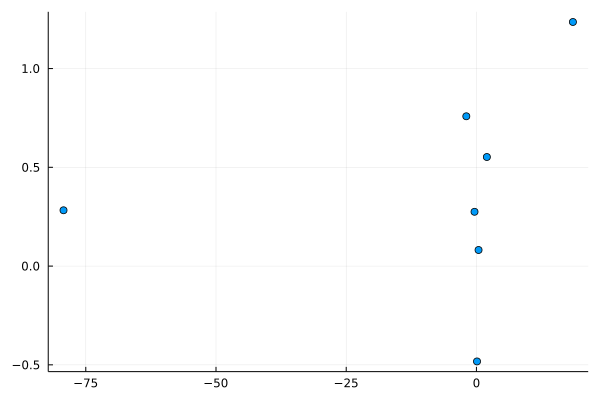

In [146]:
scatter(d2d[1,:], d2d[2,:], legend = false)

In [147]:
function dist(x, y)
    x .- y |> x -> x .* x |> sum |> sqrt
end

function cost(x)
    myx = reshape(x, 7, 2)
    s = 0.0
    for i in 1:6
        for j in (i+1):7
            s += (dist(myx[i,:], myx[j, :]) - dist(points[i,:], points[j,:]))^2.0
        end
    end
    return s
end

cost (generic function with 1 method)

In [148]:
initial = rand(7, 2)
optresult = optimize(cost, initial, GradientDescent())

 * Status: success

 * Candidate solution
    Final objective value:     7.482287e-01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.34e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.20e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.89e-15 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.52e-15 ≰ 0.0e+00
    |g(x)|                 = 8.71e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    136
    f(x) calls:    339
    ∇f(x) calls:   339


In [149]:
d2d = reshape(optresult.minimizer, 7, 2)

7×2 Matrix{Float64}:
   3.60247  -0.024171
   4.07177  -0.420142
   4.34064   0.0440607
   3.79577   0.622604
   3.76334  -0.506984
 -11.1053    6.75789
  -5.23702  -3.38922

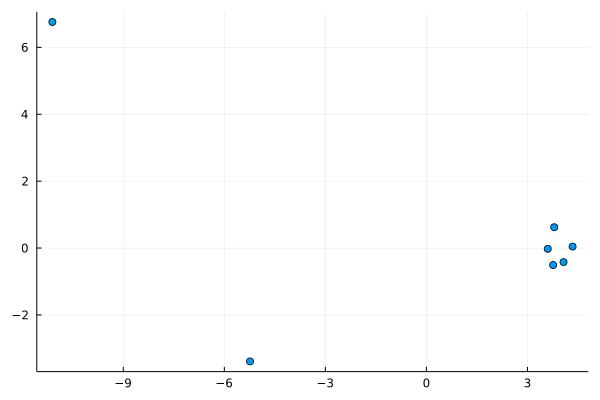

In [150]:
scatter(d2d[:,1], d2d[:,2], legend = false)